In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("/Users/apple/Desktop/CARPRICEPRED/MODEL DEVELOPMENT/OUTPUT.csv",delimiter=';')
data.head()

,name,type,price,fuel-type,year_of_make,kim,power,place
0,BMW,rad 3,37000.0,Benzín,2021.0,89999,135.0,G20 / G80
1,Volkswagen,Arteon,32000.0,Diesel,2019.0,90000,140.0,4 (5 miest)
2,Peugeot,5008,16990.0,Diesel,2016.0,78000,110.0,OE mod.14
3,Mercedes,GL trieda,32300.0,Benzín,2013.0,172140,285.0,5 (7 miest)
4,Škoda,Fabia,10400.0,Benzín+Plyn,2021.0,71000,59.0,J


In [5]:
data.shape

(7847, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7847 entries, 0 to 7846
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7847 non-null   object 
 1   type          7847 non-null   object 
 2   price         7833 non-null   float64
 3   fuel-type     7847 non-null   object 
 4   year_of_make  7822 non-null   float64
 5   kim           7847 non-null   int64  
 6   power         7839 non-null   float64
 7   place         7846 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 490.6+ KB


In [7]:
data.isnull().sum()

name             0
type             0
price           14
fuel-type        0
year_of_make    25
kim              0
power            8
place            1
dtype: int64

In [8]:
# Fill null values with mode
data['price'].fillna(data['price'].mode()[0], inplace=True)
data['year_of_make'].fillna(data['year_of_make'].mode()[0], inplace=True)
data['power'].fillna(data['power'].mode()[0], inplace=True)
data['place'].fillna(data['place'].mode()[0], inplace=True)

In [9]:
data.duplicated().sum()

124

In [10]:
data['fuel-type'].unique()

array(['Benzín', 'Diesel', 'Benzín+Plyn', 'Hybrid (benzín/elektro)',
       'Hybrid (diesel/elektro)', 'Elektro'], dtype=object)

In [11]:
data = data.drop_duplicates()

In [12]:
columns_to_drop = ['type', 'place']
# Drop the specified columns
data.drop(columns=columns_to_drop, inplace=True)

In [13]:
data['name'] = data['name'].apply(hash)
data['fuel-type'] = data['fuel-type'].apply(hash)

In [14]:
data.head()

,name,price,fuel-type,year_of_make,kim,power
0,-3390905383330625914,37000.0,5241043487187202386,2021.0,89999,135.0
1,1083169877920806263,32000.0,-6724371280097063459,2019.0,90000,140.0
2,2727814826277388362,16990.0,-6724371280097063459,2016.0,78000,110.0
3,-5709669741888455351,32300.0,5241043487187202386,2013.0,172140,285.0
4,5411398740020476592,10400.0,-213137721238451849,2021.0,71000,59.0


VISULISATIONS

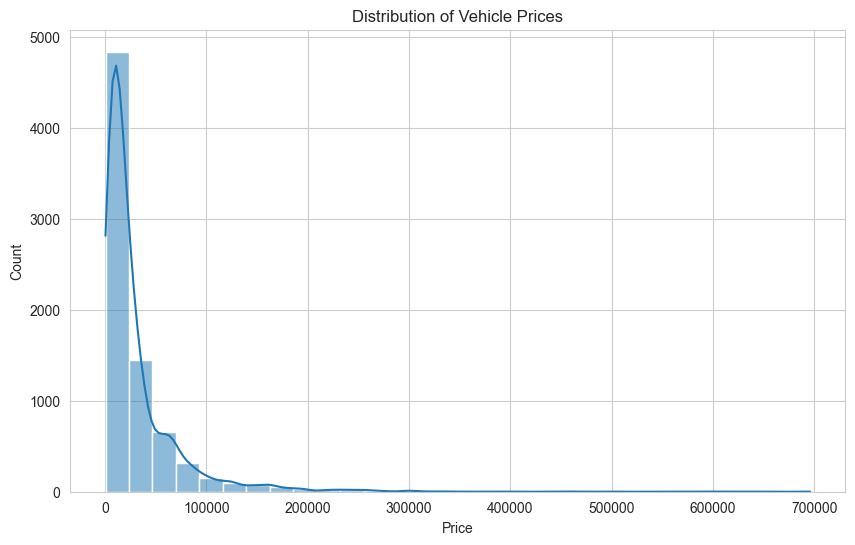

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Insight 1: Distribution of Vehicle Prices
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="price", bins=30, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Distribution of Vehicle Prices: The histogram shows the distribution of vehicle prices, indicating a right-skewed distribution with most vehicles priced at the lower end, suggesting that more affordable vehicles are more common in this dataset.

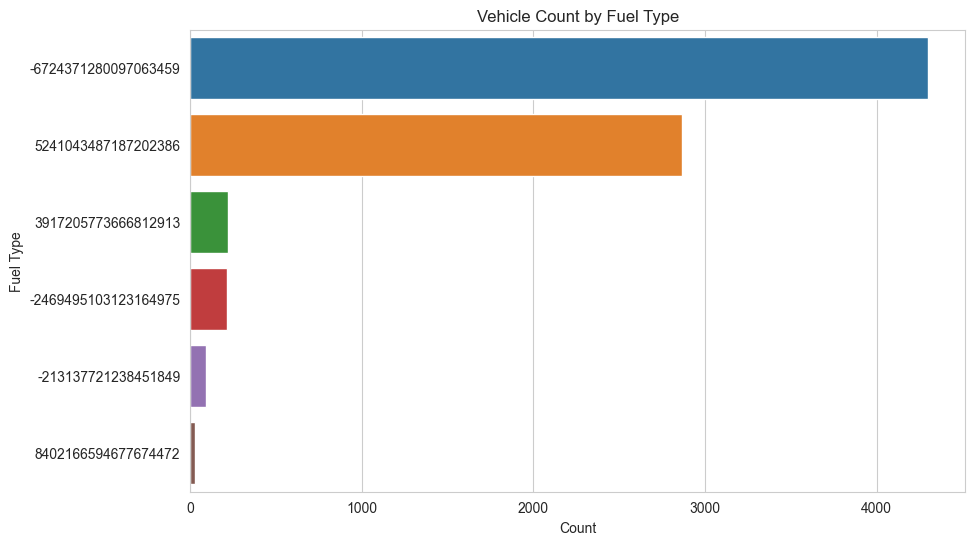

In [16]:
# Insight 2: Vehicle Count by Fuel Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y="fuel-type", order = data['fuel-type'].value_counts().index)
plt.title('Vehicle Count by Fuel Type')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

Vehicle Count by Fuel Type: The bar chart presents the number of vehicles by their fuel type, highlighting the prevalence of certain fuel types over others. Benzín (gasoline) appears to be the most common, followed by Diesel.

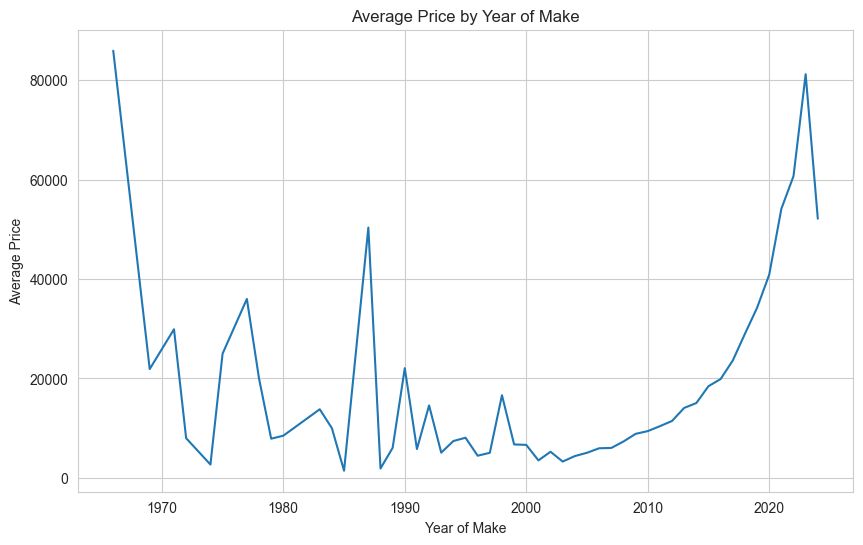

In [17]:

# Insight 3: Average Price by Year of Make
avg_price_by_year = data.groupby('year_of_make')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_year, x="year_of_make", y="price")
plt.title('Average Price by Year of Make')
plt.xlabel('Year of Make')
plt.ylabel('Average Price')
plt.show()

Average Price by Year of Make: The line chart shows the average price of vehicles by their year of manufacture, indicating a general trend that newer vehicles tend to be more expensive, with some fluctuations in price over the years.

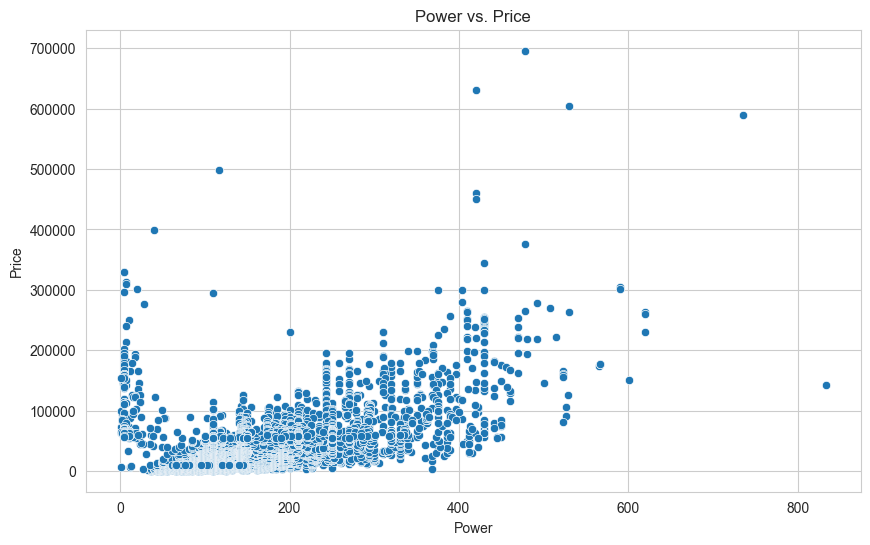

In [18]:
# Insight 4: Power vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="power", y="price")
plt.title('Power vs. Price')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

Power vs. Price: The scatter plot explores the relationship between vehicle power and price, suggesting that there is a positive correlation between the two—vehicles with higher power tend to be priced higher, though there is considerable variability.

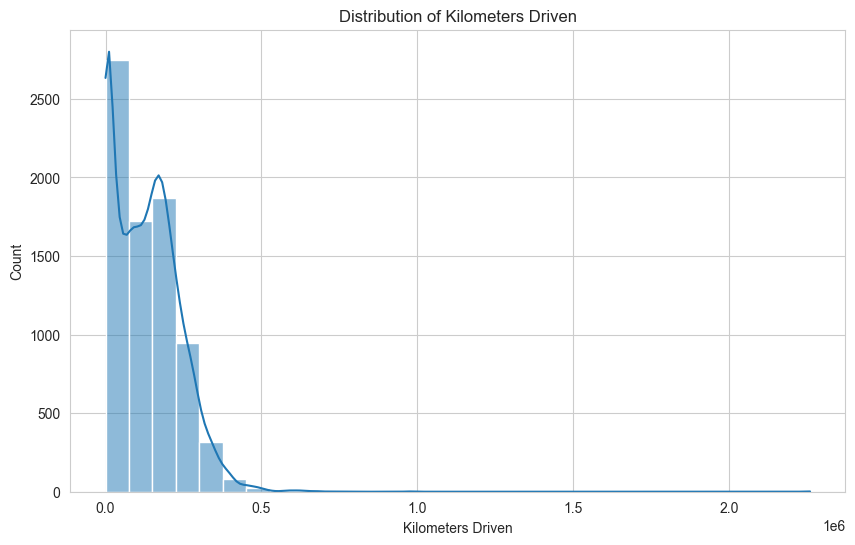

In [19]:
# Insight 5: Kilometers Driven Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="kim", bins=30, kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Count')
plt.show()


Distribution of Kilometers Driven: The histogram for kilometers driven shows a right-skewed distribution, indicating that a large number of vehicles have lower kilometers, with fewer vehicles having high kilometers driven. This suggests that newer or less-used vehicles are more common in the dataset.

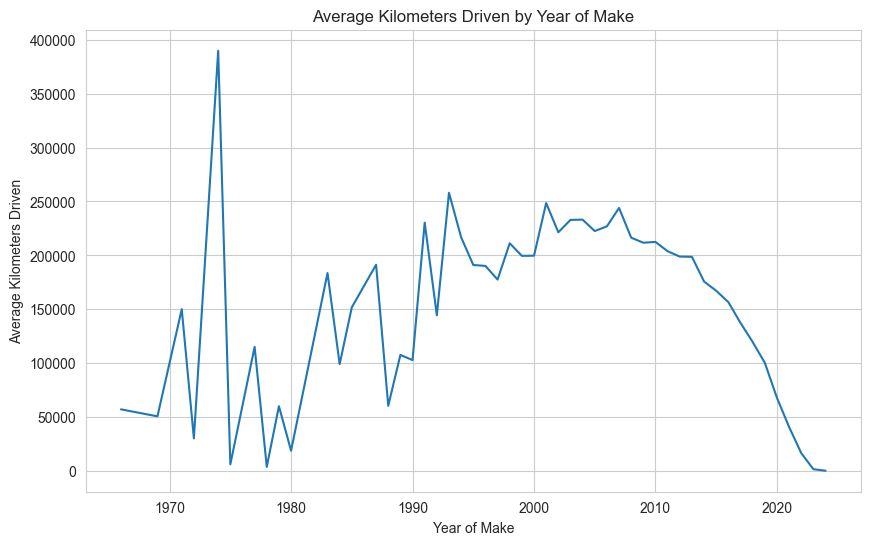

In [20]:
# Insight 6: Average Kilometers Driven by Year of Make
avg_kim_by_year = data.groupby('year_of_make')['kim'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_kim_by_year, x="year_of_make", y="kim")
plt.title('Average Kilometers Driven by Year of Make')
plt.xlabel('Year of Make')
plt.ylabel('Average Kilometers Driven')
plt.show()

Average Kilometers Driven by Year of Make: The line chart for average kilometers driven by the year of make reveals that older vehicles tend to have more kilometers on average, which aligns with expectations that older vehicles would have been used more.

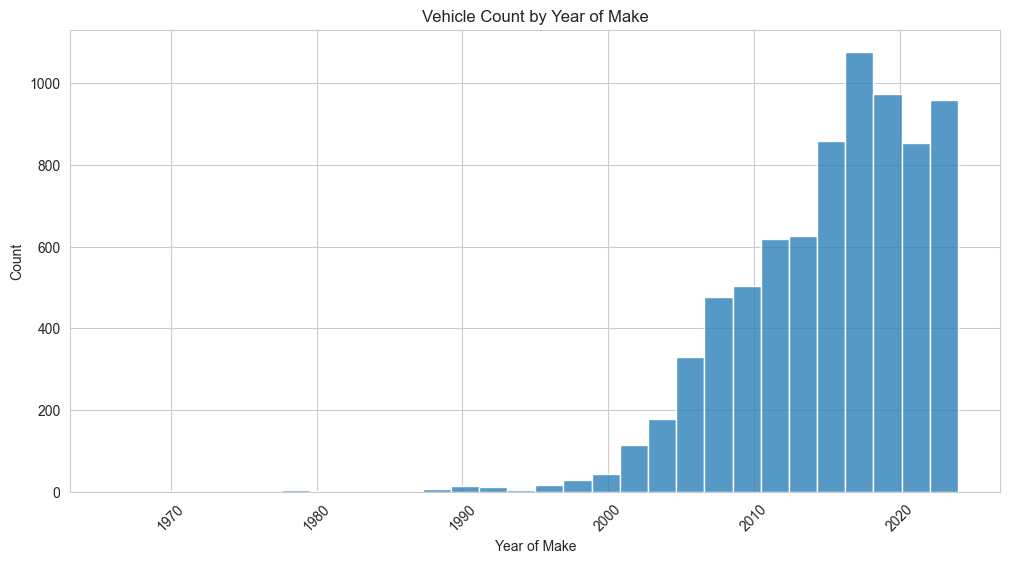

In [21]:
# Insight 7: Vehicle Count by Year of Make
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="year_of_make", bins=30, kde=False)
plt.title('Vehicle Count by Year of Make')
plt.xlabel('Year of Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Vehicle Count by Year of Make: This histogram showcases the count of vehicles by their year of manufacture, highlighting the distribution and suggesting periods of higher or lower vehicle production included in the dataset. There appears to be a concentration of vehicles from certain years, indicating potential peaks in vehicle purchases or availability.

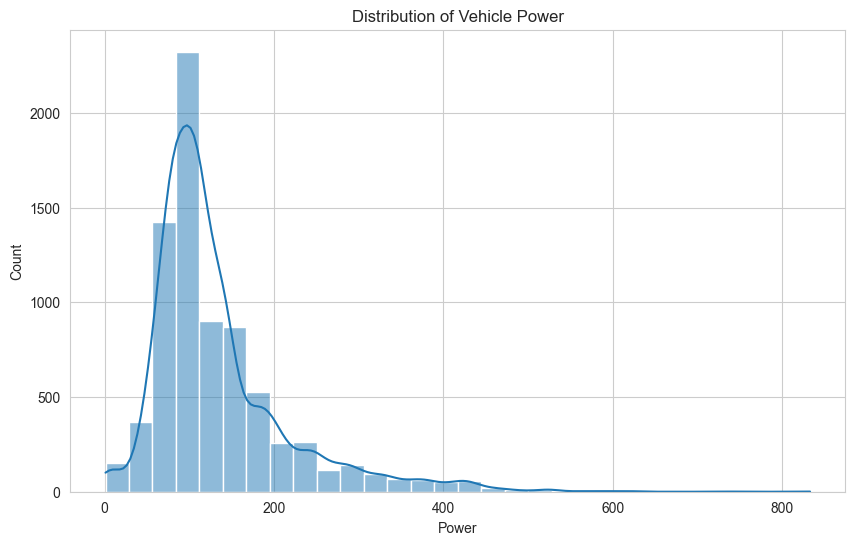

In [22]:

# Insight 9: Power Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="power", bins=30, kde=True)
plt.title('Distribution of Vehicle Power')
plt.xlabel('Power')
plt.ylabel('Count')
plt.show()

Power Distribution: The distribution of vehicle power is visualized in a histogram, showing a wide range of power values with a concentration at lower power levels. This distribution suggests the presence of both high-performance and standard-performance vehicles within the dataset.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = data[['name', 'fuel-type', 'year_of_make', 'kim', 'power']]
y = data['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_test

,name,fuel-type,year_of_make,kim,power
4308,-5709669741888455351,-6724371280097063459,2013.0,178000,125.0
2341,7938776496514157634,-6724371280097063459,2013.0,154285,85.0
2972,1083169877920806263,-6724371280097063459,2014.0,254560,103.0
1106,1777104103815448971,-6724371280097063459,1997.0,166230,73.0
6373,-1322247163846343704,-6724371280097063459,2016.0,108000,283.0
...,...,...,...,...,...
1871,5411398740020476592,5241043487187202386,2010.0,197000,77.0
1676,-1705251236901230202,5241043487187202386,2013.0,205388,74.0
303,2727814826277388362,-6724371280097063459,2019.0,85250,96.0
1898,-8709016887159878836,5241043487187202386,2013.0,101200,63.0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = data[['name', 'fuel-type', 'year_of_make', 'kim', 'power']]
y = data['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Random Forest RMSE:", rf_rmse)

# KNeighbors Regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
knn_predictions = knn_regressor.predict(X_test)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
print("KNeighbors Regressor RMSE:", knn_rmse)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
print("Gradient Boosting Regressor RMSE:", gb_rmse)

# Ridge Regression
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)
ridge_predictions = ridge_regressor.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
print("Ridge Regression RMSE:", ridge_rmse)

Random Forest RMSE: 19350.285817764136
KNeighbors Regressor RMSE: 24412.960255552553
Gradient Boosting Regressor RMSE: 20798.17226294776
Ridge Regression RMSE: 28449.579172285343


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.90674e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [26]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Calculate additional metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Random Forest
print("Random Forest Regressor Evaluation:")
evaluate_model(y_test, rf_predictions)

# KNeighbors
print("\nKNeighbors Regressor Evaluation:")
evaluate_model(y_test, knn_predictions)

# Gradient Boosting
print("\nGradient Boosting Regressor Evaluation:")
evaluate_model(y_test, gb_predictions)

# Ridge Regression
print("\nRidge Regression Evaluation:")
evaluate_model(y_test, ridge_predictions)


Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 6503.48
R-squared (R²): 0.76
Mean Absolute Percentage Error (MAPE): 33.56%

KNeighbors Regressor Evaluation:
Mean Absolute Error (MAE): 11967.76
R-squared (R²): 0.61
Mean Absolute Percentage Error (MAPE): 82.90%

Gradient Boosting Regressor Evaluation:
Mean Absolute Error (MAE): 7497.35
R-squared (R²): 0.72
Mean Absolute Percentage Error (MAPE): 39.03%

Ridge Regression Evaluation:
Mean Absolute Error (MAE): 14728.35
R-squared (R²): 0.47
Mean Absolute Percentage Error (MAPE): 123.01%


In [31]:
from sklearn.metrics import explained_variance_score, median_absolute_error

def evaluate_model_extended(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    explained_variance = explained_variance_score(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Explained Variance Score: {explained_variance:.2f}")
    print(f"Median Absolute Error: {median_ae:.2f}")

# Evaluate models
print("Random Forest Regressor Evaluation:")
evaluate_model_extended(y_test, rf_predictions)

print("\nKNeighbors Regressor Evaluation:")
evaluate_model_extended(y_test, knn_predictions)

print("\nGradient Boosting Regressor Evaluation:")
evaluate_model_extended(y_test, gb_predictions)

print("\nRidge Regression Evaluation:")
evaluate_model_extended(y_test, ridge_predictions)


Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 6503.48
R-squared (R²): 0.76
Mean Absolute Percentage Error (MAPE): 33.56%
Explained Variance Score: 0.76
Median Absolute Error: 2430.74

KNeighbors Regressor Evaluation:
Mean Absolute Error (MAE): 11967.76
R-squared (R²): 0.61
Mean Absolute Percentage Error (MAPE): 82.90%
Explained Variance Score: 0.61
Median Absolute Error: 5706.40

Gradient Boosting Regressor Evaluation:
Mean Absolute Error (MAE): 7497.35
R-squared (R²): 0.72
Mean Absolute Percentage Error (MAPE): 39.03%
Explained Variance Score: 0.72
Median Absolute Error: 3185.53

Ridge Regression Evaluation:
Mean Absolute Error (MAE): 14728.35
R-squared (R²): 0.47
Mean Absolute Percentage Error (MAPE): 123.01%
Explained Variance Score: 0.47
Median Absolute Error: 9378.16


In [32]:
import joblib

# Save Random Forest Regressor model
with open('rf_regressor.joblib', 'wb') as file:
    joblib.dump(rf_regressor, file)

# Save KNeighbors Regressor model
with open('knn_regressor.joblib', 'wb') as file:
    joblib.dump(knn_regressor, file)

# Save Gradient Boosting Regressor model
with open('gb_regressor.joblib', 'wb') as file:
    joblib.dump(gb_regressor, file)

# Save Ridge Regression model
with open('ridge_regressor.joblib', 'wb') as file:
    joblib.dump(ridge_regressor, file)


In [33]:
import joblib

# Load the models
loaded_rf_model = joblib.load('./rf_regressor.joblib')

loaded_knn_model = joblib.load('./knn_regressor.joblib')

loaded_gb_model = joblib.load('./gb_regressor.joblib')

loaded_ridge_model = joblib.load('./ridge_regressor.joblib')
